In [7]:
train_time = 1
param_num = 102916
local_data_num = 15
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 
comm_time = param_num * 4 / comm_bandwidth
fwdgrad_time_per_round = train_time*local_data_num + comm_time*local_data_num
fedsgd_time_per_round = train_time*8*local_data_num + comm_time*local_data_num*2
fedavg_time_per_round = train_time*8*local_data_num + comm_time*1*2
fwdgrad_time_per_round /= 60
fedsgd_time_per_round /= 60
fedavg_time_per_round /= 60
method_round_time = [fedavg_time_per_round,fedsgd_time_per_round,fwdgrad_time_per_round]
method_to_time = {"fedFwd":fwdgrad_time_per_round,"fedsgd":fedsgd_time_per_round,"fedavg":fedavg_time_per_round}
dataset = "agnews"

In [8]:
method_to_time

{'fedFwd': 0.3285186767578125,
 'fedsgd': 2.157037353515625,
 'fedavg': 2.0104691569010416}

In [9]:
def round_to_time(round,adhoc,eval_frequence,method):
    # adhoc = list(map(int,adhoc.split(",")))
    if adhoc == None:
        adhoc = [1,1,1]
    else:
        adhoc = list(map(int,adhoc.split(",")))
    time_list = [0]
    if method == "fedFwd":
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    else:
        time = (train_time*local_data_num*8*adhoc[0] + comm_time*local_data_num)/60
    time_list.append(time)
    for i in range(2,round):
        v_num = adhoc[i-1] if i-1 < len(adhoc) else adhoc[-1]
        if method == "fedFwd":
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        else:
            time += (train_time*local_data_num*v_num*8*eval_frequence + comm_time*local_data_num)/60
        time_list.append(time)
    return time_list

fedFwd_bert_agnews_lr0.01_client_num_100_numerical_v1.log 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

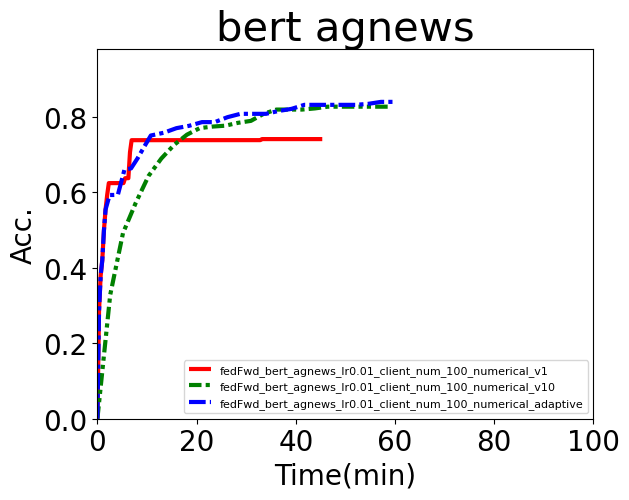

In [10]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np

eval_frequence = 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]*100
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
step = 0

file_list = [
    "fedFwd_bert_agnews_lr0.01_client_num_100_numerical_v1.log",
    "fedFwd_bert_agnews_lr0.01_client_num_100_numerical_v10.log",
    "fedFwd_bert_agnews_lr0.01_client_num_100_numerical_adaptive.log"
]

for i,file in enumerate(file_list):
    if file.endswith(".log"):
        acc = [0]
        if "v_10" in file:
            # adhoc = file.split("_")[-1].split(".")[0]
            adhoc = "10, 10, 10"
        elif "adaptive" in file:
            adhoc = "1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10"
        else:
                adhoc = None
        with open(file,"r") as f:
            cur_max = 0
            log = f.readlines()
            for l in log:
                if "'acc':" in l:
                    cur_acc = float(l[l.rfind("'acc':")+7:l.rfind(",")])
                    if cur_acc > cur_max:
                        cur_max = cur_acc
                    else:
                        cur_acc = cur_max
                    acc.append(cur_acc)
                # if len(acc)>200:
                #     break
                if "adhoc" in l:
                    adhoc = l[l.rfind("[")+1:-2]
            print(file,adhoc)
            method = file.split("_")[0]
            plt.plot(round_to_time(len(acc),adhoc,eval_frequence,method), acc, linestyle=linestyle[i-step], color=colors[i-step],label=file.replace(".log","").replace("fedFwd_distilbert_agnews_","").replace("fedSgd_distilbert_agnews_",""),linewidth=lw)
    elif file.endswith(".bak"):
        step += 1
plt.xlabel("Time(min)",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,100)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=8)
plt.title(f"bert agnews",fontsize=30)
plt.show()

fedFwd_bert_agnews_lr0.01_client_num_100_numerical_v10.log 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 1

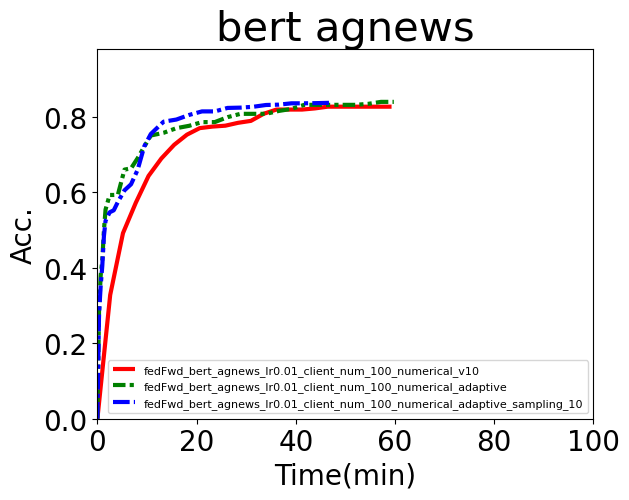

In [11]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np

eval_frequence = 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]*100
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
step = 0

file_list = [
    "fedFwd_bert_agnews_lr0.01_client_num_100_numerical_v10.log",
    "fedFwd_bert_agnews_lr0.01_client_num_100_numerical_adaptive.log",
    "fedFwd_bert_agnews_lr0.01_client_num_100_numerical_adaptive_sampling_10.log"

]

for i,file in enumerate(file_list):
    if file.endswith(".log"):
        acc = [0]
        if "v_10" in file:
            # adhoc = file.split("_")[-1].split(".")[0]
            adhoc = "10, 10, 10"
        elif "adaptive" in file:
            adhoc = "1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10"
        else:
                adhoc = None
        with open(file,"r") as f:
            cur_max = 0
            log = f.readlines()
            for l in log:
                if "'acc':" in l:
                    cur_acc = float(l[l.rfind("'acc':")+7:l.rfind(",")])
                    if cur_acc > cur_max:
                        cur_max = cur_acc
                    else:
                        cur_acc = cur_max
                    acc.append(cur_acc)
                # if len(acc)>200:
                #     break
                if "adhoc" in l:
                    adhoc = l[l.rfind("[")+1:-2]
            print(file,adhoc)
            method = file.split("_")[0]
            plt.plot(round_to_time(len(acc),adhoc,eval_frequence,method), acc, linestyle=linestyle[i-step], color=colors[i-step],label=file.replace(".log","").replace("fedFwd_distilbert_agnews_","").replace("fedSgd_distilbert_agnews_",""),linewidth=lw)
    elif file.endswith(".bak"):
        step += 1
plt.xlabel("Time(min)",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,100)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=8)
plt.title(f"bert agnews",fontsize=30)
plt.show()

In [12]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np

eval_frequence = 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]*100
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3
step = 0

file_list = [
    "fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_muti_v_10.log",
    "fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_v10_sampling_10.log",
    "fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_adaptive_sampling_10.log"

]

for i,file in enumerate(file_list):
    if file.endswith(".log"):
        acc = [0]
        if "v_10" in file:
            # adhoc = file.split("_")[-1].split(".")[0]
            adhoc = "10, 10, 10"
        elif "adaptive" in file:
            adhoc = "1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10"
        else:
                adhoc = None
        with open(file,"r") as f:
            cur_max = 0
            log = f.readlines()
            for l in log:
                if "'acc':" in l:
                    cur_acc = float(l[l.rfind("'acc':")+7:l.rfind(",")])
                    if cur_acc > cur_max:
                        cur_max = cur_acc
                    else:
                        cur_acc = cur_max
                    acc.append(cur_acc)
                # if len(acc)>200:
                #     break
                if "adhoc" in l:
                    adhoc = l[l.rfind("[")+1:-2]
            print(file,adhoc)
            method = file.split("_")[0]
            plt.plot(round_to_time(len(acc),adhoc,eval_frequence,method), acc, linestyle=linestyle[i-step], color=colors[i-step],label=file.replace(".log","").replace("fedFwd_distilbert_agnews_","").replace("fedSgd_distilbert_agnews_",""),linewidth=lw)
    elif file.endswith(".bak"):
        step += 1
plt.xlabel("Time(min)",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,100)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=8)
plt.title(f"distilbert agnews",fontsize=30)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'fedFwd_distilbert_agnews_lr0.01_client_num_100_numerical_muti_v_10.log'

param_num: 109485316
[0, 88.53066711425781, 177.06133422851562, 265.5920013427734, 354.12266845703124, 442.65333557128906, 531.1840026855468, 619.7146697998046, 708.2453369140624, 796.7760040283201, 885.3066711425779, 973.8373382568357, 1062.3680053710934, 1150.8986724853512, 1239.429339599609, 1327.9600067138667, 1416.4906738281245, 1505.0213409423823, 1593.55200805664, 1682.0826751708978, 1770.6133422851556, 1859.1440093994133, 1947.674676513671, 2036.2053436279289, 2124.736010742187, 2213.266677856445, 2301.797344970703, 2390.328012084961, 2478.858679199219, 2567.389346313477, 2655.920013427735, 2744.450680541993, 2832.981347656251, 2921.512014770509, 3010.042681884767, 3098.573348999025, 3187.104016113283, 3275.634683227541, 3364.165350341799, 3452.696017456057, 3541.226684570315, 3629.7573516845728, 3718.2880187988308, 3806.8186859130888, 3895.3493530273468, 3983.8800201416047, 4072.4106872558627, 4160.94135437012, 4249.472021484378, 4338.002688598636, 4426.533355712894, 4515.0640

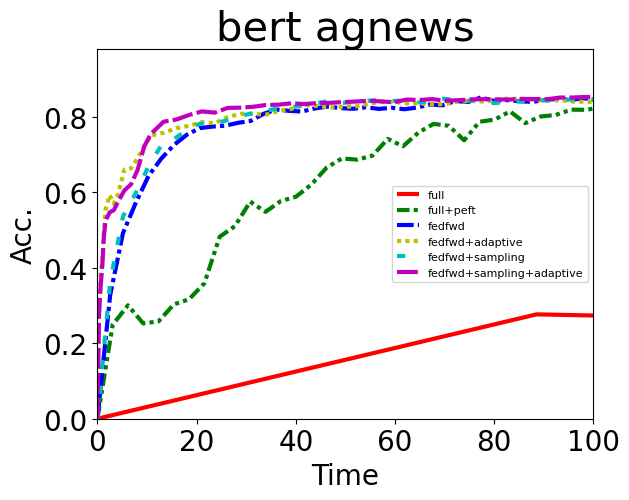

In [1]:
import os 
import sys
import matplotlib.pyplot as plt
import numpy as np


dataset = "agnews"
model = "bert"

logging_file = {
    "full":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/bert_agnews/fedsgd_bert_agnews_lr0.01_client_num_10_full.log",
    "full+peft":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/bert_agnews/fedsgd_bert_agnews_lr0.01_client_num_10_bitfit.log",
    "fedfwd":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/adaptive/bert_agnews/fedFwd_bert_agnews_lr0.01_client_num_100_numerical_v10.log",
    "fedfwd+adaptive":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/adaptive/bert_agnews/fedFwd_bert_agnews_lr0.01_client_num_100_numerical_adaptive.log",
    "fedfwd+sampling":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/adaptive/bert_agnews/fedFwd_bert_agnews_lr0.01_client_num_100_numerical_v10_sampling_10.log",
    "fedfwd+sampling+adaptive":"/data/wyz/FedNLP/experiments/distributed/transformer_exps/run_tc_exps/log/end2end/adaptive/bert_agnews/fedFwd_bert_agnews_lr0.01_client_num_100_numerical_adaptive_sampling_10.log"
}

train_time_dict = {"full":20,"full+peft":12,"fedfwd":1,"fedfwd+adaptive":1,"fedfwd+sampling":1,"fedfwd+sampling+adaptive":1}
local_data_num_dict = {"agnews":15,"yahoo":18,"yelp-p":65}
comm_bandwidth = 10 * 1024**2 /8  # k * 1024**2 /8 => k Mb/s 

eval_frequence = 5 if dataset == "yahoo" else 1
linestyle = [(0, ( )), (0, (3, 1,1,1,1,1)), (0, (4, 1,1,1)), (0, (1, 1)),(0, (2, 4)), (0, (5, 1)),(0,(3,1,3,1)),(0,(4,3,3,1))]*100
colors=['r','g','b','y','c','m','k',"tan"] * 100
lw = 3

def round_to_time(round,eval_frequence,comm_time,method,local_data_num,adhoc=None):
    train_time = train_time_dict[method]
    if adhoc == None:
        adhoc = [1,1,1]
    else:
        adhoc = list(map(int,adhoc.split(",")))
    time_list = [0]
    if method == "ours":
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    else:
        time = (train_time*local_data_num*adhoc[0] + comm_time*local_data_num)/60
    time_list.append(time)
    for i in range(2,round):
        v_num = adhoc[i-1] if i-1 < len(adhoc) else adhoc[-1]
        if method == "ours":
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        else:
            time += (train_time*local_data_num*v_num*eval_frequence + comm_time*local_data_num)/60
        time_list.append(time)
    return time_list
    

for i,method in enumerate(logging_file):
    file = logging_file[method]
    local_data_num = local_data_num_dict[dataset]
    if "v_10" in file:
        # adhoc = file.split("_")[-1].split(".")[0]
        adhoc = "10, 10, 10"
    elif "adaptive" in file:
        adhoc = "1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10"
    else:
        adhoc = None
    with open(file) as f:
        for line in f:
            if "adhoc" in line:
                adhoc = line[line.rfind("[")+1:-2]
            if "Trainable" in line:
                param_num = int(line[line.rfind(":")+2:-2])
                print(f"param_num: {param_num}")
                break
        comm_time = param_num * 4 / comm_bandwidth
        acc = [0]
        for line in f:
            if "'acc':" in line:
                acc.append(float(line[line.rfind("'acc':")+7:line.rfind(",")]))
        print(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc))
        plt.plot(round_to_time(len(acc),eval_frequence,comm_time,method,local_data_num,adhoc), acc, linestyle=linestyle[i], color=colors[i],label=method,linewidth=lw)
plt.xlabel("Time",fontsize=20)
plt.ylabel("Acc.",fontsize=20)
plt.xticks(size = 20)
plt.xlim(0,100)
plt.yticks(size = 20)
plt.ylim(0,0.98)
plt.legend(fontsize=8)
plt.title(f"{model} {dataset}",fontsize=30)
plt.show()